In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder

In [2]:
data = pd.read_csv("Final_Data.csv")
data.head(2)

,Unnamed: 0,Desingations_CEO,Desingations_Founder,Desingations_HR,Desingations_Head_engg,Desingations_Missing,Desingations_VP,Unnamed: 0.1,Contact Status,Noida,...,softwaredevelopmenttest,ionicapp,traineesoftwaretesting,traineesoftware,tester,trainee,magento,uideveloper,Company_Name,Company_Type
0,0,0,1,0,0,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10Times,1
1,1,0,1,0,0,0,0,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1Mg.Com,1


In [3]:
data.drop(columns=["Company_Name", "Unnamed: 0", "Unnamed: 0.1"], inplace=True)

In [4]:
data.shape

(6543, 255)

In [5]:
data.head(2)

,Desingations_CEO,Desingations_Founder,Desingations_HR,Desingations_Head_engg,Desingations_Missing,Desingations_VP,Contact Status,Noida,Delhi,Gurgaon,...,javacloud,softwaredevelopmenttest,ionicapp,traineesoftwaretesting,traineesoftware,tester,trainee,magento,uideveloper,Company_Type
0,0,1,0,0,0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


* __For Company_Type__ 
    * __0__ - Startup
    * __1__ - Non-Startup 
* __For Company_Name__ 
    * __0__ - No respose from client
    * __1__ - Client responded 
   

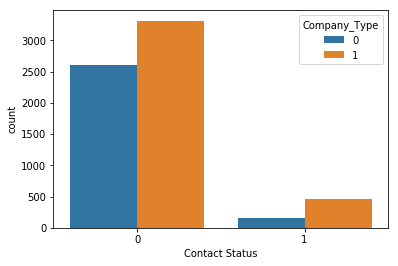

In [8]:
ax = sb.countplot(x="Contact Status", data=data,  hue="Company_Type")

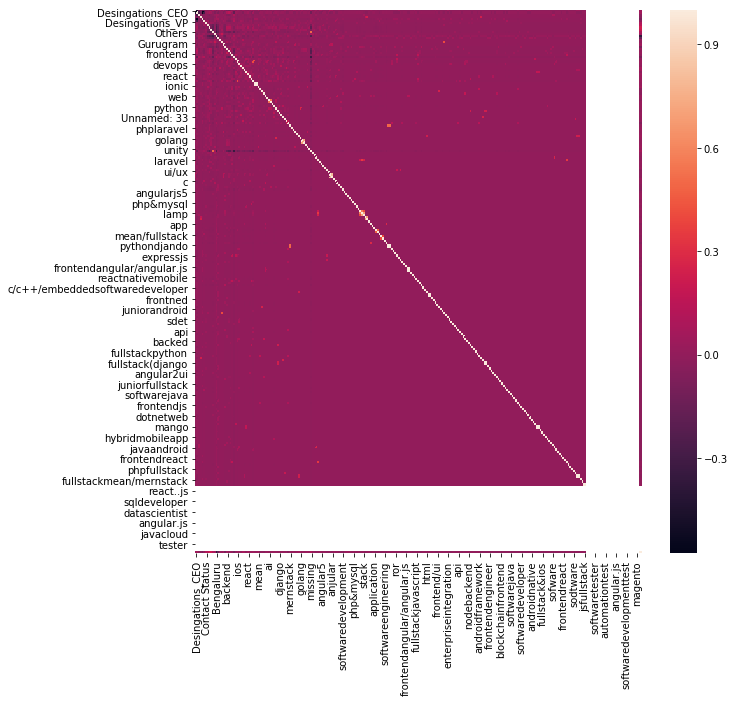

In [107]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr())

# Seperating Feature and label

In [108]:
X = pd.DataFrame(data.drop(columns="Contact Status"))
y = pd.DataFrame(data["Contact Status"])

In [109]:
X.shape, y.shape

((6543, 254), (6543, 1))

# Divide the data into 1:3 ratio

In [110]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
X_train.shape, X_test.shape

((4907, 254), (1636, 254))

# Apply Random Forest Algorithm on the data

In [112]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 128, criterion = 'gini', random_state = 55)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=1,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

In [113]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1444,   30],
       [ 160,    2]])

In [115]:
from sklearn.metrics import *
f1_score(y_test, y_pred)  

0.020618556701030927

In [116]:
accuracy_score(y_test, y_pred)

0.8838630806845966

# Apply SVM Algorithm on the data

In [117]:
# Fitting SVC Classification to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1471,    3],
       [ 162,    0]])

In [118]:
accuracy_score(y_test, y_pred)

0.8991442542787286

In [119]:
from sklearn.metrics import *
f1_score(y_test, y_pred)  

0.0

# Logistic regression

In [120]:
from sklearn.linear_model import LogisticRegression
classify = LogisticRegression(random_state=45)
classify.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1471,    3],
       [ 162,    0]])

In [121]:
accuracy_score(y_test, y_pred)

0.8991442542787286

In [122]:
from sklearn.metrics import *
f1_score(y_test, y_pred)  

0.0

# Decision Tree Classification

In [123]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1440,   34],
       [ 160,    2]])

In [124]:
from sklearn.metrics import *
f1_score(y_test, y_pred)

0.0202020202020202

In [125]:
accuracy_score(y_test, y_pred)

0.8814180929095354

# KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier
classify = KNeighborsClassifier(n_neighbors = 3, metric = "minkowski", p = 2)
classify.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1440,   34],
       [ 160,    2]])

In [127]:
accuracy_score(y_test, y_pred)

0.8814180929095354

In [128]:
from sklearn.metrics import *
f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)

(0.0202020202020202, 0.8814180929095354)

# Decision Tree Using Bagging

In [131]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm, model.score(X_test,y_test)

(array([[1440,   34],
        [ 160,    2]]), 0.8850855745721271)

# AdaBoost Classifier

In [132]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm, model.score(X_test,y_test)

(array([[1440,   34],
        [ 160,    2]]), 0.8991442542787286)

# Gradient Boosting Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm, model.score(X_test,y_test)


(array([[1440,   34],
        [ 160,    2]]), 0.9009779951100244)